<a href="https://www.kaggle.com/code/fabianofebras/projeto-final-ebac-fabiano-francisco?scriptVersionId=173363632" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<!-- # <span style="color:#FFFFFF; font-size: 0%;">1 | Introduction</span>
<div style="border-radius: 0px; background-color: #112241; text-align:center;">
    <h4 style="color: white; padding: 1.5rem; font-size: 19px"><b>1 | INTRODUCTION</b></h4>
</div>
<!-- <br> -->

<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="flex: 0; margin-top: 8px;">
        <img src="https://happay.com/blog/wp-content/uploads/sites/12/2022/09/baas-banking-as-a-service-.png" alt="Image" style="max-width: 300px; max-height: 350px; height:360px" />
    </div>
    <div style="flex: 1; margin-left: 30px; margin-top: 6px">
        <p style="font-weight: bold; color: black; font-size: 17px">Projeto Final EBAC</p>
        <p>Este notebook trata-se do projeto final do curso de análise de dados Python ministrado pela EBAC,Escola Britânica de Artes Criativas e Tecnologia;
        </p>
        <p>Iremos analisar um conjunto de dados fictícios referentes a clientes de um banco,também fictício,principalmente no que diz respeito a inadimplência;
        </p>
        <p>O objetivo é prever,com os dados que temos,um potencial cliente a se tornar inadimplente e assim tornar a concessão de crédito mais segura para ambos,cliente e banco, e assim minimizar a inadimplência de nossos clientes;</p>
        <blockquote>Vale ressaltar que por conta dos nossos dados serem fictícios toda a análise feita aqui está de acordo com a lei nº13709,Lei Geral de Proteção de Dados Pessoais,de 14 de agosto de 2018.</blockquote>
    </div>
</div>

<h1 style="font-family: 'poppins'; font-weight: bold; color: #FFBB00;">👨‍💻Autor : Fabiano Francisco Febras Manoel

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/FabianoFebras)
[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/fabianoffebras/)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/fabiano-febras-a59812232/)
    <p> Vale ressaltar que muitos dos meus projetos ainda serão lançados.</p>
    
## Conteúdo:

<hr>

1. [Explorando os dados](#data)
2. [Análise dos dados](#eda)
3. [Conclusão](#concl)


### Todas as bibliotecas usadas:

- Numpy
- Pandas
- Matplotlib
- Seaborn


Agora vamos importar as bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Explorando os dados: <a name="data"></a>

- O Dataset para essa análise foi fornecido pela própria EBAC e como já foi dito é totalmente fictício;
## 1.1 Descrição dos Dados:

- **id:** Um identificador único para cada cliente
- **default:** Identifica se o cliente é adimplente(0) ou inadimplente(1)
- **idade:** Idade do cliente
- **sexo:** Sexo do cliente
- **dependentes:** Quantos dependentes o cliente possui cadastrado
- **escolaridade:** Nível de escolaridade do cliente
- **estado_civil** Estado civil do cliente,solteiro ou casado
- **salario_anual:** Salário do cliente ,anualmente calculado
- **tipo_cartao:** Tipo do cartão do cliente
- **meses_de_relacionamento:** Tempo,em meses,que o cliente está com o banco

## 1.2 Análise preliminar:
- Depois de ler o arquivo podemos fazer uma análise geral dos dados,estrutura,tipos de dados,quantidade de linhas e colunas;

In [2]:
df_data = pd.read_csv('/kaggle/input/dados-bancarios/Python_M10_support material.csv')

In [3]:
df_data.head(3)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20


In [4]:
df_data.shape

(10127, 16)

In [5]:
df_data.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

## 1.3 Modelando os dados:
- Após essas análises preliminares podemos identificar algumas coisas;
- existem dados categóricos que não são relevantes para a nossa abordagem;
- as variáveis 'limite_credito' e 'valor_transacoes_12m' são 'strings' logo,precisamos converter-las para 'float'.

In [6]:
df_data['limite_credito'] = df_data['limite_credito'].str.replace('.','').str.replace(',','.').astype(float)
df_data['valor_transacoes_12m'] = df_data['valor_transacoes_12m'].str.replace('.','').str.replace(',','.').astype(float)

In [7]:
df_data['default'] = df_data["default"].map({0: 'adimplente', 1: 'inadimplente'})

In [8]:
df_data.dtypes

id                           int64
default                     object
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

## 1.4 Valores vazios ou duplicados:
- Vamos checar se existem valores vazios ou duplicados e tratar deles.

In [9]:
print(f'existem valores vazios? {df_data.isna().values.any()} e duplicados ? {df_data.duplicated().values.any()}')

existem valores vazios? False e duplicados ? False


- como não há duplicados ou valores vazios vamos prosseguir.

# 2. Análise dos dados: <a name="eda"></a>
- Com os dados devidamente convertidos vamos partir para a análise que busca,por meio dos gráficos,procurar uma correlação entre os dados que explique e sirva para prever os clientes inadimplentes

## 2.1 Ressalva sobre os dados:
- Cabe ressaltar que dados categóricos como sexo,idade, etc... Não serão usados nessa análise,visto que o foco não é uma análise social,mas sim visando os critérios de concessão de crédito.
## 2.2 Começando:
- Vamos começar com algumas análises como porcentagem de inadimplentes e adimplentes.

In [10]:
situacao = df_data['default'].value_counts()

In [11]:
fig = px.pie(
             values=situacao.values,
             title="Porcentagem de adimplentes e inadimplentes",
             names=['adimplentes','inadimplentes'],
             )

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

- O nosso banco possui uma quantidade muito maior de clientes adimplentes, o que é um bom sinal inicial;
- Agora vamos explorar os dados para explicar os inadimplentes e posteriormente poder prever os mesmos.

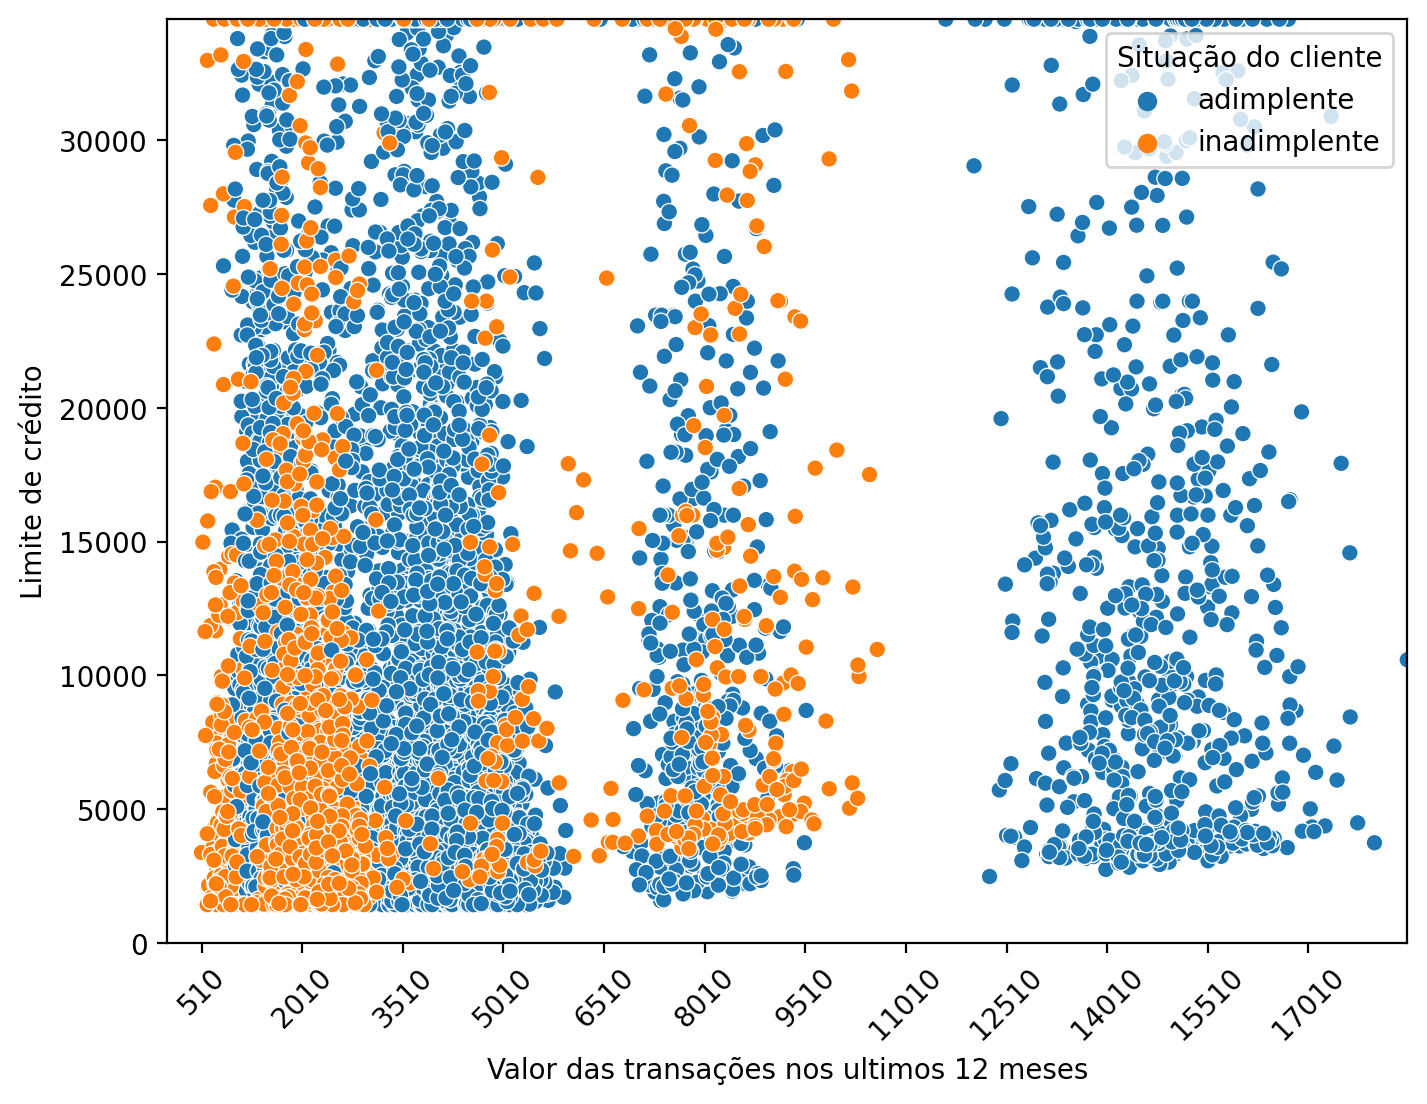

In [12]:
plt.figure(figsize=(8,6), dpi=200)
ax = sns.scatterplot(df_data,
                x = 'valor_transacoes_12m',
                y = 'limite_credito',
                hue = 'default',
               )
ax.set(ylim=(0, df_data.limite_credito.max()),
       xlim=(0, df_data.valor_transacoes_12m.max()),
       ylabel='Limite de crédito',
       xlabel='Valor das transações nos ultimos 12 meses')
ax.legend(title='Situação do cliente', loc="upper right")
plt.xticks(np.arange(df_data.valor_transacoes_12m.min(),
                     df_data.valor_transacoes_12m.max(),
                     1500),rotation = 45) 
plt.show()

- Podemos reparar que clientes que fazem transações a partir de 12.000 no ano não se tornam inadimplentes,independente do limite de crédito;
- Há um acumulo muito grande de inadimplentes na faixa de limite de crédito de 0 a 20.000 que transacionam até 3500

## A escolaridade interfere nessa questão ? pode ser uma questão levantada,vamos conferir:

In [13]:
adim_vs_inadim = df_data.groupby(["escolaridade", "default"], as_index=False).agg({'id': pd.Series.count})

In [14]:
g_bar = px.bar(adim_vs_inadim,
               x='escolaridade',
               y='id',
               title='Escolaridade de Adimplentes e inadimplentes',
               color='default',
               barmode='group')

g_bar.update_layout(xaxis_title='Escolaridade',
                    yaxis_title='Quantidade de clientes',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))

g_bar.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



- Esses dados são interessantes,porém não estamos analisando de um ponto de vista social,poderíamos questionar a relação do nível de escolaridade com o salário e a inadimplência,visando a educação finânceira,porém não é a itenção do projeto.

In [15]:
frequencia = df_data['default'].sum()

In [16]:
hist = px.histogram(df_data,
                   x='qtd_transacoes_12m',
                   color='default',
                   nbins=30,
                   opacity=0.5,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)

hist.update_layout(xaxis_title='Quantidade de transações',
                   yaxis_title='Frequência',)

hist.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



- Podemos visualizar que os clientes inadimplentes realizam consideravelmente menos transações que os adimplentes,principalmente na faixa de 30 a 45,em contrapartida os clientes adimplentes se concentram entre 60 e 80 transações anuais.

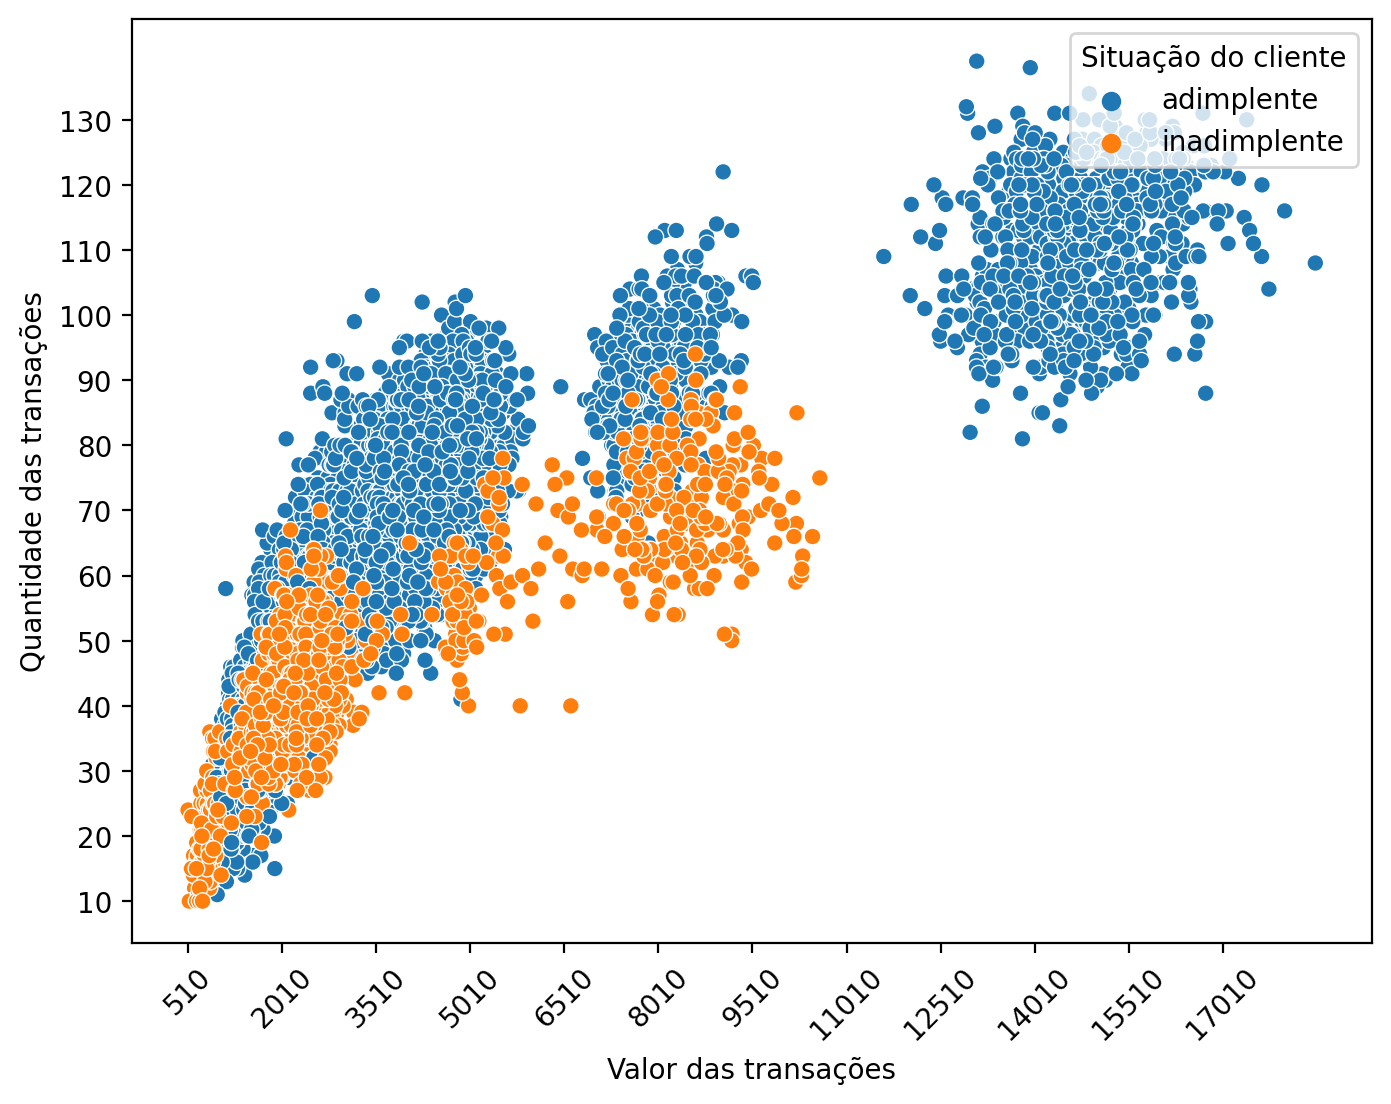

In [17]:
plt.figure(figsize=(8,6), dpi=200)
ax = sns.scatterplot(df_data,
                y = 'qtd_transacoes_12m',
                x = 'valor_transacoes_12m',
                hue = 'default',
               )
plt.xticks(np.arange(df_data.valor_transacoes_12m.min(),
                     df_data.valor_transacoes_12m.max(),
                     1500),rotation = 45) 
plt.yticks(np.arange(df_data.qtd_transacoes_12m.min(),
                     df_data.qtd_transacoes_12m.max(),
                     10)) 
ax.set(
       xlabel='Valor das transações',
       ylabel='Quantidade das transações')                                      
ax.legend(title='Situação do cliente', loc="upper right")
plt.show()

- Este gráfico é muito interessante,os clientes inadimplentes realizam poucas transações em pequeno montante;
- A  partir de transações de 11000 não existem inadimplentes;
- O cliente que realiza transações entre 6500 e 9500,porém movimentam esse montante em menos de 80 operações anuais têm grandes chances de se tornarem inadimplentes;
- Os clientes inadimplentes se concentram muito entre valores de 500 a 3500 a menos de 60 operações anuais.

In [18]:
fig = px.box(df_data, 
             x="default",
             y="qtd_transacoes_12m",
             color = 'default',
             title = 'Adimplentes x inadimplentes: quantidade de transações')
fig.update_layout(
    xaxis_title="Situação",
    yaxis_title="Quantidade de transações",
    showlegend = False,
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 5
    ))
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



- Aqui podemos confirmar que clientes inadimplentes realizam menos transações de fato,se concentrando na faixa de 35 a 50

# 3. Conclusão: <a name="concl"></a>
- Podemos concluir que se um cliente realiza poucas transações anuais,principalmente entre 35 e 50, num montante de até 9500 e possui um limite de crédito de até 15000 o mesmo pode ser considerado,por previsão,um cliente inadimplente em potencial,devendo,pois, ser analisado mais profundamente os dados desse cliente e a concessão de crédito ser mais minuciosa.
<hr> </hr>
- Este projeto eu não usei modelos de previsões com linguagem natural e machine learning,pois não é a proposta,porém seria perfeitamente possível aplicar estes modelos aqui,garantindo uma previsão muito acertiva com considerável porcentagem de acerto e considerável baixo desvio padrão.
